# Final Project

## Name: <span style="color:blue"> *TyShawn Thompson* </span>

In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain
                       date  precipitation     temp_max     temp_min  \
count                  1461    1461.000000  1461.000000  1461.000000   
unique                  NaN            NaN          NaN          NaN   
top                     NaN            NaN          NaN          NaN   
freq                    NaN            NaN          NaN          NaN   
mean    2013-12-31 00:00:00       3.029432    16.439083     8.234771   
min     2012-01-01 00:00:00       0.000000    -1.600000    -7.100000   
25%     2012-12-31 00:00:00       0.000000    10.600000     4.400000   
50%     2013-12-31 00:00:00       0.000000    

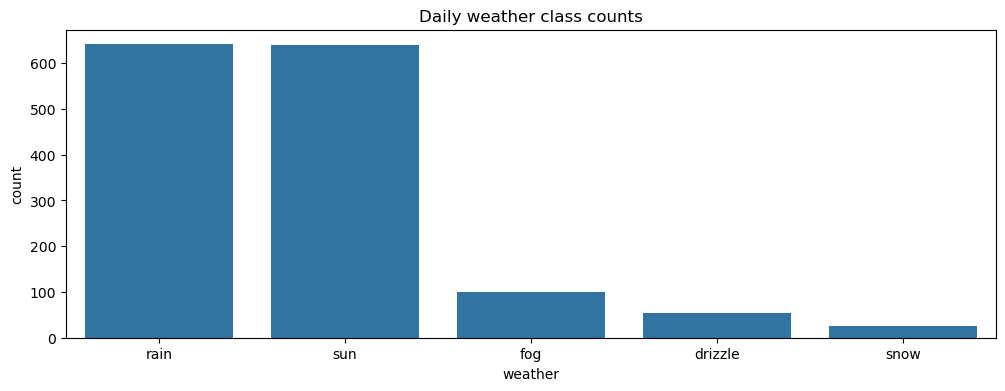

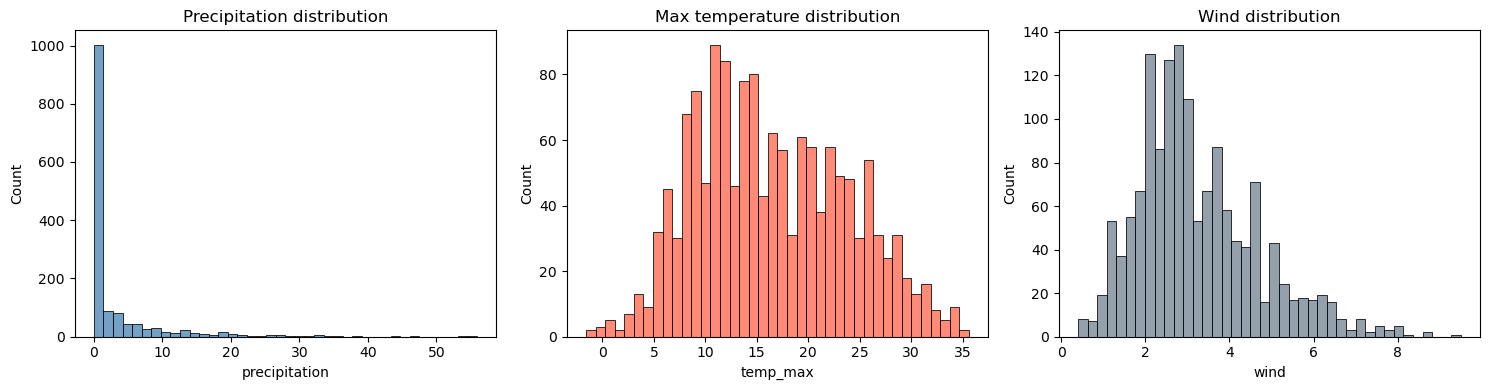

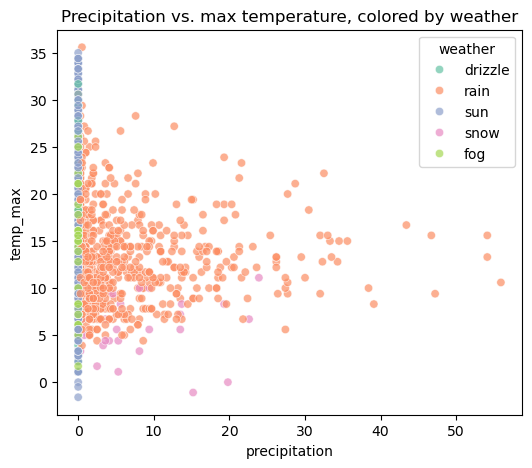

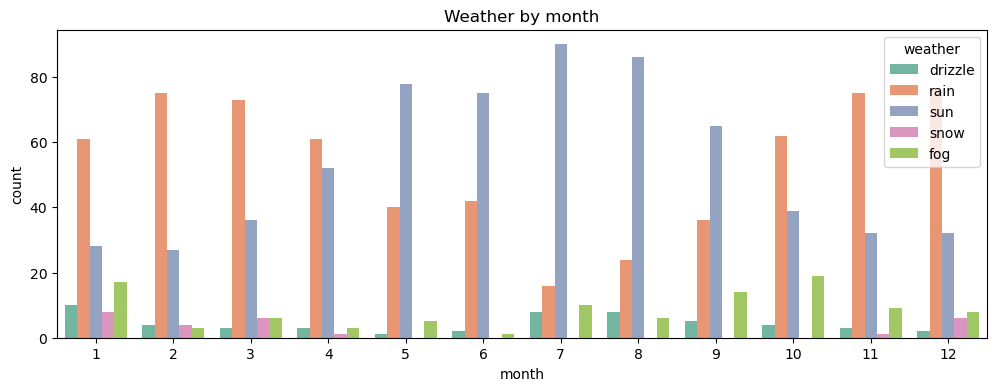

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("seattle-weather.csv", parse_dates=["date"])

print(df.head())
print(df.describe(include="all"))

# Class counts
class_counts = df["weather"].value_counts()
print("Class counts:\n", class_counts)

# Visuals: distributions & relationships
plt.figure(figsize=(12, 4))
sns.countplot(x="weather", data=df, order=class_counts.index)
plt.title("Daily weather class counts")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(df["precipitation"], bins=40, ax=axes[0], color="steelblue")
axes[0].set_title("Precipitation distribution")
sns.histplot(df["temp_max"], bins=40, ax=axes[1], color="tomato")
axes[1].set_title("Max temperature distribution")
sns.histplot(df["wind"], bins=40, ax=axes[2], color="slategray")
axes[2].set_title("Wind distribution")
plt.tight_layout()  
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(
    x="precipitation", y="temp_max", hue="weather",
    data=df, palette="Set2", alpha=0.7
)
plt.title("Precipitation vs. max temperature, colored by weather")
plt.show()

# Experiment Add month to see seasonality in a simple way
df["month"] = df["date"].dt.month
plt.figure(figsize=(12,4))
sns.countplot(x="month", hue="weather", data=df, palette="Set2")
plt.title("Weather by month")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target
le = LabelEncoder()
df["weather_label"] = le.fit_transform(df["weather"])

# Features & target
X = df[["precipitation", "temp_max", "temp_min", "wind"]].values
y = df["weather_label"].values

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Classes:", list(le.classes_))


Classes: ['drizzle', 'fog', 'rain', 'snow', 'sun']


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Multinomial logistic regression
log_clf = LogisticRegression(solver="lbfgs", max_iter=10000)
log_clf.fit(X_train_scaled, y_train)

# Random forest (baseline hyperparameters)
rf_clf = RandomForestClassifier(
    n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
)
rf_clf.fit(X_train, y_train) 


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

Logistic Regression Accuracy: 0.7759562841530054
Logistic Regression Report:
               precision    recall  f1-score   support

     drizzle      0.000     0.000     0.000        13
         fog      0.000     0.000     0.000        25
        rain      0.898     0.820     0.857       161
        snow      0.500     0.143     0.222         7
         sun      0.696     0.944     0.801       160

    accuracy                          0.776       366
   macro avg      0.419     0.381     0.376       366
weighted avg      0.709     0.776     0.731       366



c:\Users\bette\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bette\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bette\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

<Figure size 600x500 with 0 Axes>

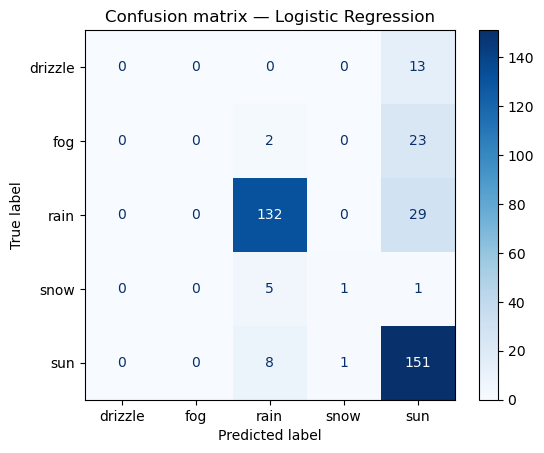

Random Forest Accuracy: 0.8142076502732241
Random Forest Report:
               precision    recall  f1-score   support

     drizzle      0.111     0.077     0.091        13
         fog      0.294     0.200     0.238        25
        rain      0.960     0.901     0.929       161
        snow      1.000     0.429     0.600         7
         sun      0.774     0.900     0.832       160

    accuracy                          0.814       366
   macro avg      0.628     0.501     0.538       366
weighted avg      0.804     0.814     0.804       366



<Figure size 600x500 with 0 Axes>

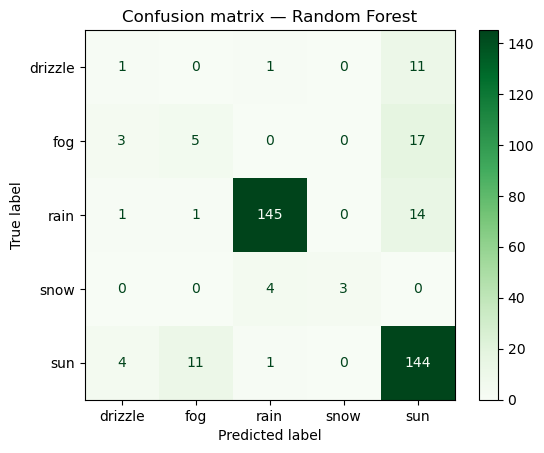

In [5]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Evaluate Logistic Regression
y_pred_log = log_clf.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(
    y_test, y_pred_log, target_names=le.classes_, digits=3
))

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=le.classes_, cmap="Blues")
plt.title("Confusion matrix — Logistic Regression")
plt.show()

# Evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(
    y_test, y_pred_rf, target_names=le.classes_, digits=3
))

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=le.classes_, cmap="Greens")
plt.title("Confusion matrix — Random Forest")
plt.show()
